![Linear Regression Models](Images/polynomial_regularization.png)

🐇 The central problem of all supervised learning (not only linear models) is the **bias–variance tradeoff**.  
Let’s find out what this means.

---

## Bias and Variance

Up until now, we have trained models on all available data.  
On one hand, this makes sense — we want to minimize model errors by using as much data as possible for training.  

On the other hand, this approach makes it harder to evaluate how well the model actually performs.  
The reason is that if we continue to calculate metrics only on training data, we may find that when the model is applied to unseen data, it performs quite poorly.

<div style="background-color:#2c2c2c; border:1px solid #555; color:#f0f0f0; padding:12px; border-radius:6px; margin:12px 0;">
→ In other words, the model may fit the training set in great detail but fail to capture the general underlying patterns.
</div>

---

### Overfitting (High Variance)

This problem is called **overfitting**.  
Essentially, such a model performs much better on the training data than on new data.  
It has become too finely tuned to the unique characteristics of the training set, which are not generalizable patterns.

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Overfitting:</b> Low error on training data, but high error on test (unseen) data.
</div>

---

### Underfitting (High Bias)

**Underfitting** is the opposite problem.  
Here, the model is too weak to capture any meaningful patterns in the data.  
As a result, the error is high both on the training data and on the unseen data.

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Underfitting:</b> High error on both training and test data.
</div>


<p align="center">
  <img src="Images/under_over_fit.jpg" width="920" alt="Gradient descent illustration">
</p>

# Bias and Variance: Theoretical Definitions

From a theoretical perspective, **underfitting** and **overfitting** are described by the concepts of **bias** and **variance** of a model.

---

### Bias (Systematic Error)

**Bias** is the expected difference between the true outcome and the model’s predicted outcome.  
In other words, it is the expected error of the model:

$
bias(\hat{y}) = M \big[ (y - \hat{y}) \big]
$

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Note:</b> The expectation operator is often denoted as <code>E</code>:  

$$
bias(\hat{y}) = E \big[ (y - \hat{y}) \big]
$$

The larger the bias, the weaker the model.  
If the model is weak, it fails to capture patterns in the data → this is **underfitting**.

---

### Variance (Model Instability)

**Variance** is the variability of the error, i.e., how much the error will differ if the model is trained on different samples of the data.  
Mathematically, this is the **dispersion** (spread) of the model’s predictions:

$$
variance(\hat{y}) = D \big[ (y - \hat{y}) \big]
$$

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Note:</b> Variance is often denoted as <code>Var</code>:  

$$
variance(\hat{y}) = Var \big[ (y - \hat{y}) \big]
$$
</div>


# Bias–Variance Decomposition of MSE

The greater the variance, the more the model’s error fluctuates across different datasets.  
High variance is a sign of **overfitting**: the model adapts too closely to a specific training set and shows unstable predictions on new data.

---

## Theoretical Decomposition

In theory, any loss function can be decomposed into **bias** and **variance** components.  
For example, the decomposition of the **mean squared error (MSE)** (its mathematical expectation) looks like this:

$$
M \big[ (y - \hat{y})^2 \big] = bias(\hat{y})^2 + variance(\hat{y}) + \sigma^2
$$

---

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Note:</b> The expectation of the squared error is the theoretical analogue of MSE:

$$
MSE = \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n}
$$

Mathematical expectation is the average across the **entire population** (an infinite dataset), not just a sample.  
This makes it a purely theoretical quantity.
</div>

---

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Formula breakdown:</b><br>
- σ² — irreducible error, caused by randomness.<br>
- bias(ŷ)² — squared bias of the model.<br>
- variance(ŷ) — variance (spread) of the model’s predictions.
</div>

---

## What does this theoretical formula tell us?

The total error of the model is composed of:
- The squared bias of the model,  
- The variance of the model, and  
- Random irreducible error.

<div style="background-color:#2c2c2c; border:1px solid #555; color:#f0f0f0; padding:12px; border-radius:6px; margin:12px 0;">
→ We cannot influence the last term σ², but we can act on bias and variance.  
Ideally, we want both to approach zero.  
However, in practice, reducing one often increases the other.  
This is the essence of the <code>bias–variance tradeoff</code>.
</div>


# The Bias–Variance Tradeoff

→ We cannot influence the last term ($\sigma^2$), but we can affect the first two terms (**bias** and **variance**).  
Ideally, we would like to reduce both to zero.  
However, decreasing one usually increases the other.  
In practice, we must balance between biased but stable models and unbiased but unstable ones.

---

## The Bias–Variance Dilemma

The **bias–variance tradeoff** is the central problem of supervised learning.  
Ideally, we want to build a model that accurately captures patterns in training data and also performs well on unseen data.  
Unfortunately, this is rarely possible simultaneously.

---

<div style="background-color:#5c1e1e; border:1px solid #a33; color:#f0f0f0; padding:12px; border-radius:6px; margin:12px 0;">
- Making the model more complex reduces <code>bias</code> but increases the risk of <code>overfitting</code> i.e., higher <code>variance</code>.  
- Simpler models tend to have lower <code>variance</code> (less risk of overfitting), but they may fail to capture relationships in the data → higher <code>bias</code> (underfitting).
</div>

---

## Analogy: Darts Player 🎯

Imagine the model is a darts player:

- The **best player** has both low bias and low variance: darts land tightly grouped right at the bullseye.  
- A player with **high bias** will have darts clustered together, but away from the bullseye.  
- A player with **high variance** will have darts scattered all over the board.  
- A **bad model** has both: darts are spread out and not near the bullseye.

This analogy shows how **bias** and **variance** interact in practice.



<p align="center">
  <img src="Images/bias_variance_targets_clean.png" width="720" alt="Gradient descent illustration">
</p>

# Interesting Fact: Gauss–Markov Theorem

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Interesting fact.</b> According to the <a href="https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem">Gauss–Markov theorem</a>, the estimates of linear regression obtained by the <b>ordinary least squares (OLS)</b> method have the smallest variance.  

That is, if there exists another linear model trained by a method different from OLS (e.g., gradient descent), the theorem guarantees that this model will have variance **greater than or equal to** that of the OLS model.  

Thus, for linear regression trained with OLS, the risk of overfitting is the lowest.  

However, this does not mean that overfitting is impossible at all.
</div>

---

# From Theory to Practice: How to Detect Bias and Variance?

Now that we know the theoretical foundations of underfitting and overfitting, what can we do in practice to judge a model’s ability to generalize?  
How do we diagnose high **bias** and **variance**?

The typical solution is to split the data into two parts:  
- **Training set** — used to train the model and adjust parameters.  
- **Test set** — unseen by the model during training, used to assess the true quality of the model.

This separation allows us to evaluate generalization ability.  
Schematically, it can be represented as follows:


<p align="center">
  <img src="Images/train_split.png" width="720" alt="Gradient descent illustration">
</p>

# Let’s see how this works in practice

We’ll use a dataset you already know — the **housing** data.

In [2]:
import numpy as np          # matrix computations
import pandas as pd         # data analysis & preprocessing
import matplotlib.pyplot as plt  # visualization
import seaborn as sns       # visualization
from sklearn import linear_model  # linear models
from sklearn import metrics       # metrics

In [3]:
# Column names in the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load the Boston housing data (space-separated text)
housing_data = pd.read_csv('Data/HousingDataSet.csv',
                          header=None,
                          delimiter=r"\s+",
                          names=column_names)

display(housing_data.head())

# Build the list of features (exclude the target column)
features = housing_data.drop('MEDV', axis=1).columns

# Observation matrix X and target vector y
X = housing_data[features]
y = housing_data['MEDV']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Train/Test Split in `sklearn`

In `sklearn`, you can split data into training and test sets with [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from `model_selection`.  
The function accepts the following key arguments:

- **`X` and `y`** — the matrix of examples and the target vector.
- **`random_state`** — an integer seed used to generate random numbers.  
  Both the training and test sets are created randomly. To make your experiment **reproducible**, set this parameter to a fixed value.
- **`test_size`** — the share of the dataset used for the **test** split.  
  Typical choices are **0.3** (70/30 split) or **0.2** (80/20 split).

<div style="background-color:#2c2c2c; border:1px solid #555; color:#f0f0f0; padding:12px; border-radius:6px; margin:12px 0;">
<b>Return values (in order):</b> <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>.
</div>

### Example: Split the Housing data 70/30

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test in a 70/30 ratio
# Fix random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=40
)

# Show resulting shapes
print('Train:', X_train.shape, y_train.shape)
print('Test:',  X_test.shape,  y_test.shape)

# Expected:
# Train: (354, 13) (354,)
# Test:  (152, 13) (152,)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


- After the split, the training set contains 354 observations and the test set contains 152.

In [5]:
# Create the LinearRegression model
lr_model = linear_model.LinearRegression()

# Fit OLS on the training data
lr_model.fit(X_train, y_train)

# Predict on train and test
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

# Report R²
print(f"Train R^2: {round(metrics.r2_score(y_train, y_train_predict), 3)}")
print(f"Test R^2: {round(metrics.r2_score(y_test, y_test_predict), 3)}")

# Example output:
# Train R^2: 0.743
# Test  R^2: 0.722

Train R^2: 0.743
Test R^2: 0.722


So, we obtained $R^2 = 0.743$ on the training set and $R^2 = 0.722$ on the test set.  
These results are quite close to each other, which indicates a **low variance** (the model’s predictions are stable across different splits).

---

This is evidence of the absence of **overfitting**.  
Not surprisingly — linear regression with 13 features is a rather simple model: only **14 parameters** in total, which is very small by machine learning standards.  
The risk of overfitting increases as the number of features grows.

---

### But what about bias?

The simplest way to assess model bias (underfitting) is to look at the metric value and **intuitively evaluate its adequacy**.  

Our test score is $R^2 = 0.722$.  
This is not a particularly strong result (recall that the maximum is 1).  
It may indicate that the model is **too weak**.  

One way to address this is to try a more complex model — for example, a **polynomial regression**.

---

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Note:</b> There are more advanced visualization methods for assessing bias and variance, such as the <b>learning curve</b> and <b>cross-validation</b>.  
We will cover these later in the course.
</div>


# Polynomial Features

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Polynomial Regression</b> — is a more complex model than linear regression.  
Instead of a straight-line equation, it uses a polynomial (multinomial) equation.  
The degree of the polynomial can be arbitrarily large: the higher the degree, the more complex the model.
</div>

---

In the simple two-dimensional case, when we study the dependence of the target variable on a single feature,  
a second-degree polynomial gives the equation of a parabola:

$$
\hat{y} = w_0 + w_1 x + w_2 x^2
$$

Geometrically, in two-dimensional space, a polynomial is a **curve** that tries to describe the dependence in the data.  
It looks like this:


<p align="center">
  <img src="Images/polynomial_regression.png" width="620" alt="Gradient descent illustration">
</p>

When there is more than one feature — for example, two — then in addition to squaring each feature,  
we also get **interaction terms** from $x_1$ and $x_2$:

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_1^2 + w_3 x_2 + w_4 x_2^2 + w_5 x_1 x_2
$$

Such a model describes a **complex surface in three-dimensional space**,  
as illustrated in the figure:


<p align="center">
  <img src="Images/polynomial_surface_3d.png" width="620" alt="Gradient descent illustration">
</p>

Notice how quickly the **number of coefficients** grows — and with it, the **complexity of the model**.  
And that’s just with two features ($x_1$ and $x_2$).  
We won’t write out the general polynomial equation (as we did for linear regression),  
because it would contain too many terms.

---

For example, when we previously plotted the relationship between the **median housing price** and the **percentage of lower-status population**,  
you might have noticed that the relationship is not linear, but rather **polynomial** in nature.


<p align="center">
  <img src="Images/linear_vs_polynomial_regression.png" width="620" alt="Gradient descent illustration">
</p>

In the figure, you can see models of **linear regression** and **polynomial regression (degree 2)**.

---

Notice that the powers of $x$ can also be considered as a kind of **artificial features** in the data.  
They are called **polynomial features**.

Therefore, polynomial regression is essentially the same linear regression, just with **new features**.  
Polynomial features are one of the most widely used methods of **feature engineering**.

### Example:

<p align="center">
  <img src="Images/polynomial_features_tables.png" width="720" alt="Gradient descent illustration">
</p>

→ Thanks to polynomial terms, the model becomes **more complex** and begins to capture more complicated dependencies,  
resulting in **lower bias**.  
However, as you might guess, the risk of **overfitting** increases sharply — the variance of predictions grows with the number of factors.

---

## Polynomial Regression in `sklearn`

Building a polynomial regression in `sklearn` is straightforward.  
We first need to create polynomial features using the class [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from the `preprocessing` module.  

This transformer generates polynomial features of any degree and adds them to the dataset.  
It has two key parameters:

- **`degree`** — the degree of the polynomial. Default is `2`.
- **`include_bias`** — whether to include a column of ones ($x^0$) in the resulting feature set.  
  Default is `True`, but it’s often better to set it to `False` because the column of ones is already added in OLS regression.

---

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Note:</b> In practice, data scientists usually stop at a polynomial of degree 2 (or at most degree 3).  
The higher the degree, the more terms are generated, which means more features and a more complex model.
</div>

---

To fit the generator and calculate the number of polynomial feature combinations, we use the method **`.fit()`**.  
To actually generate the new feature table (with polynomial features included), we use **`.transform()`**, passing in the dataset.


In [6]:
from sklearn import preprocessing

# Create the polynomial feature generator
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

# Fit on the training data (learns the combinations schema)
poly.fit(X_train)

# Generate polynomial features for train and test
X_train_poly = poly.transform(X_train)
X_test_poly  = poly.transform(X_test)

# Show resulting shapes
print(X_train_poly.shape)
print(X_test_poly.shape)

# Expected:
# (354, 104)
# (152, 104)

(354, 104)
(152, 104)


So, we generated new **training** and **test** datasets.  
In each table, in addition to the 13 original features, we now have **91 polynomial combinations of degree 2**.

In [7]:
print(type(X_train_poly))
print(type(X_test_poly))
# <class 'numpy.ndarray'>
# <class 'numpy.ndarray'>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


As a result, we obtained two **NumPy arrays**:

- `X_train_poly` — training features (354 × 104)  
- `X_test_poly` — test features (152 × 104)

In [8]:
# Create the LinearRegression model
lr_model_poly = linear_model.LinearRegression()

# Fit OLS on polynomial features
lr_model_poly.fit(X_train_poly, y_train)

# Predictions
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
y_test_predict_poly  = lr_model_poly.predict(X_test_poly)

# R² on train and test
print(f"Train R^2: {metrics.r2_score(y_train, y_train_predict_poly):.3f}")
print(f"Test  R^2: {metrics.r2_score(y_test,  y_test_predict_poly):.3f}")

# Example output:
# Train R^2: 0.929
# Test  R^2: 0.268

Train R^2: 0.929
Test  R^2: 0.268


Amazing! On the training set, the coefficient of determination is $R^2 = 0.929$,  
which means our model explains almost **93%** of the variance in the data.  

But when we look at the test set results, we come crashing down: $R^2 = 0.268$.  
This metric is much lower than on the training set.  
This is a clear case of **overfitting**: due to its complexity (large number of features),  
the model has fully adapted to the training data but shows very high variance on data it has never seen before.

---

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Note:</b> A linear regression model can also be unstable even if train and test scores are close,  
because the regression coefficients themselves may take extremely large values.
</div>

---

Such a model is practically useless, since it does not reflect reality.  

But don’t worry — there is a powerful method that can save our model from overfitting:  
**regularization**.

# Regularization

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Regularization</b> — a method for reducing overfitting in machine learning models.
</div>

---

The idea of regularization is that we intentionally **increase the bias** of the model in order to **reduce variance**.  
This is the **law of balance** in action!

But how can we increase the bias of a model?  
We can *“penalize”* the model for learning overly complex relationships.

Mathematically, this is done by adding a **penalty term** to the loss function.

---

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Penalty</b> — an additional non-negative term in the loss function expression,  
which deliberately increases the error.  

Thanks to this term, the optimization method (OLS or SGD) no longer finds the *true* minimum of the loss function,  
but instead converges to a **pseudo-minimum** that balances fit and model complexity.
</div>


There are several ways to add a **penalty term** to the loss function:

---

- **L1 Regularization (Lasso)** — adds the sum of the absolute values of the coefficients,  
  multiplied by the regularization parameter $\alpha$:

$$
L_{1}(w) = MSE + \alpha \sum_{j=1}^{m} |w_j|
$$

---

- **L2 Regularization (Ridge), or Tikhonov Regularization** — adds the sum of the squares of the coefficients,  
  multiplied by the regularization parameter $\alpha$:

$$
L_{2}(w) = MSE + \alpha \sum_{j=1}^{m} (w_j)^2
$$

---

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Regularization coefficient &alpha;</b> — controls how much bias we introduce into the model.  
The larger &alpha;, the stronger the penalty for overfitting.
</div>

### Geometric Interpretation of Regularization

What about the **geometry**?  
Let’s consider how the minimum of the loss function looks in 3D space (top view).

- With **L1 regularization** $L_1(w)$, the minimum is found at the intersection with a **diamond-shaped constraint**.
- With **L2 regularization** $L_2(w)$, the minimum is found at the intersection with a **circular constraint**.

Visualization is shown below:


<p align="center">
  <img src="Images/l1_l2_regularization.ppm" width="720" alt="Gradient descent illustration">
</p>


<p align="center">
  <img src="Images/l1_l2_regul_graph.png" width="420" alt="Gradient descent illustration">
</p>

## Geometric view of regularization: where does the minimum come from?

The figures above illustrate solving the loss-minimization problem.

### For the **right** figure (L1):
$$
L_{1}(w)=\frac{\sum_{i=1}^{n}\left(y_i-w_0-w_1x_1\right)^2}{n}
\;+\; \alpha\left(\,|w_0|+|w_1|\,\right)\;\;\to\;\min_{w}
$$

### For the **left** figure (L2):
$$
L_{2}(w)=\frac{\sum_{i=1}^{n}\left(y_i-w_0-w_1x_1\right)^2}{n}
\;+\; \alpha\left(\,(w_0)^2+(w_1)^2\,\right)\;\;\to\;\min_{w}
$$

The concentric circles (level sets) depict the MSE loss  
$$
MSE=\frac{\sum_{i=1}^{n}(y_i-\hat y_i)^2}{n}.
$$
The extra regularization terms define constraint curves:
- $\lambda_1=\alpha(|w_0|+|w_1|)$ — a **diamond** (L1),
- $\lambda_2=\alpha\big((w_0)^2+(w_1)^2\big)$ — a **circle** (L2).

Thus, after adding the penalty $\lambda$, we no longer take the true unconstrained minimum, but a **pseudo-minimum** at the **intersection** of the MSE level set with the diamond (for L1) or the circle (for L2).  
This is **constrained optimization**, typically derived via the **method of Lagrange multipliers**.

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Note.</b> In <code>sklearn</code>, these optimization problems are solved with an iterative
<a href="https://scikit-learn.org/stable/modules/linear_model.html#lasso">coordinate descent</a> algorithm (conceptually similar in spirit to gradient methods, but updating one coordinate at a time rather than using full gradients).
</div>

### Why L1 is special (sparsity)
A distinctive property of **L1** regularization is that coefficients for “unnecessary” features are driven **exactly to zero**.
Those features drop out of the prediction entirely.  
This is crucial for complex models with many inputs (e.g., our 91 extra polynomial features): by shrinking the model and inducing sparsity, we reduce variance — and therefore **mitigate overfitting**.


In conclusion to the theoretical part, it’s worth noting that in practice, we never know in advance which regularization method will work best.  
**The solution:** try both methods and compare results.

---

## Time to move on to practice!

Experience shows that training linear regression models with many features is recommended on **standardized (normalized) data**.

---

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Note:</b> A common question is: <b>how should we standardize/normalize when we have both training and test sets?</b>  

You must <b>fit</b> the transformation <b>only on the training set</b>, and then use it (with the same parameters) to <b>transform</b> both the training and test sets.  
If you fit separately on each set, you will introduce bias into the model.
</div>

---

Standardization (normalization) is best done **before generating polynomial features**, otherwise we risk losing scale consistency across polynomials.

Let’s preprocess our data now.


In [9]:
## Standardize → Generate Polynomial Features (degree=2)
from sklearn import preprocessing

# INitialize the scaler
scaler = preprocessing.StandardScaler()

# Fit scaler on the Train set only (learns the scaling parameters from the training data such as mean and std deviation)
scaler.fit(X_train)

# Transform (i.e., standardize) train and test with the same scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Create polynomial feature generator (degree=2, no bias column)
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

# Generate polynomial features for train and test
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly  = poly.transform(X_test_scaled)

# Check shapes
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

# Expected:
# (354, 104)
# (152, 104)


(354, 104)
(152, 104)


→ In **sklearn**, regularization methods are implemented in the classes  
[`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (L1 regularization) and  
[`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) (L2 regularization).  

Both methods search for parameters with an added regularization penalty.  
The training and prediction process looks the same as for ordinary linear regression.

---

## Train a Lasso Regression Model

Now let’s build a **linear regression with L1 regularization (Lasso)**  
using the polynomial features we generated earlier.

The main initialization parameter of `Lasso` is **`alpha`** (regularization strength).  
- Default: `alpha=1`.  
- In practice, this is often **too strong** for L1.  

Let’s set `alpha=0.1` instead:

In [10]:
# L1-regularized linear regression (Lasso)
lasso_lr_poly = linear_model.Lasso(alpha=0.1)
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

# Predictions
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict_poly  = lasso_lr_poly.predict(X_test_scaled_poly)

# R² on train/test
print(f"Train R^2: {metrics.r2_score(y_train, y_train_predict_poly):.3f}")
print(f"Test  R^2: {metrics.r2_score(y_test,  y_test_predict_poly):.3f}")

# Example output:
# Train R^2: 0.879
# Test  R^2: 0.882

Train R^2: 0.879
Test  R^2: 0.882


<div style="background-color:#2c2c2c; border:1px solid #555; color:#f0f0f0; padding:12px; border-radius:6px; margin:12px 0;">
<b>Notice how the metrics have changed:</b><br>
- On the training set: R² = 0.879. The score decreased (before standardization + regularization it was R² = 0.929).<br>
- On the test set: R² = 0.882. The score increased significantly (before it was only R² = 0.268).<br><br>
👉 We successfully overcame <b>overfitting</b>.
</div>

Now let’s output the model’s coefficient values, rounded to three decimal places:

In [11]:
print(np.round(lasso_lr_poly.coef_, 3))

[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


> **Note:** Pay attention: most of the coefficients have become zero. This means that the features corresponding to these coefficients are not used in the prediction of the Lasso regression model.

Now let’s train a linear regression model with L2 regularization on the same data.  
For L2 regularization, the parameter `alpha` is 1 by default. Let’s try using the parameter value `alpha=10`:


In [12]:
# Create an object of the linear regression class with L2 regularization
ridge_lr_poly = linear_model.Ridge(alpha=10)

# Train the model
ridge_lr_poly.fit(X_train_scaled_poly, y_train)

# Make predictions for the training set
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)

# Make predictions for the test set
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)

# Calculate the coefficient of determination for both sets
print(f'Train R^2: {round(metrics.r2_score(y_train, y_train_predict_poly), 3)}')
print(f'Test R^2: {round(metrics.r2_score(y_test, y_test_predict_poly), 3)}')

# Train R^2: 0.907
# Test R^2: 0.831

Train R^2: 0.907
Test R^2: 0.848


The values of the metric $R^2$ on the test set for `L1-regularization` turned out to be slightly `higher`.  
First of all, we always focus on the test set — these are the data the model has not seen before.

Let’s now output the values of the model coefficients, rounding them to the third decimal place:

In [13]:
print(np.round(ridge_lr_poly.coef_, 3))

[ 0.128 -0.049  0.084  0.117 -0.932  2.848 -1.008 -1.464  0.909 -0.908
 -0.653  0.971 -2.605  0.085 -0.032  0.466  2.721 -0.507  0.986  0.309
 -0.391 -0.714  0.376 -0.379  0.072  0.287  0.143 -0.138 -0.014  0.315
  0.05  -0.409 -0.316  0.075  0.702  0.08  -0.281 -0.37   0.511  0.175
  0.72   0.282  0.477  0.888 -0.012  0.074 -0.052  0.166 -0.263  0.414
 -1.129 -0.852  0.273  0.227 -0.106  0.368 -0.137 -0.241 -0.697 -0.177
 -0.326 -0.524  0.882 -0.637  0.344 -0.439 -0.006  0.386  0.233 -0.535
  0.111 -0.802 -0.662 -0.56   0.22  -1.001  0.123  0.144  0.889 -0.114
 -0.086 -1.022 -0.71   1.08  -0.446 -0.178 -0.07  -0.496  0.874 -0.926
  0.717  0.601 -0.49  -0.723  0.308  1.086 -0.448 -1.256  0.057  0.354
 -0.059 -0.433 -0.791  0.177]


It can be seen that L2-regularization does not zero out coefficients — it uses `ALL` features for prediction.

> The parameter `alpha` is very important: the choice of its value determines how strongly we penalize the model for overfitting.  
> It is important to find the value that gives the best effect.  
> Try manually changing the parameter `alpha` for the models built earlier. Agree, this is not very convenient.

Let’s organize a process for iterating over model parameters: we’ll create a loop in which we will iterate over 20 different values of `alpha` in the range from 0.001 to 1.  
The easiest way to create such a list is with the `linspace()` function from the **numpy** library.

In the loop, we will train a linear regression model with L1-regularization (Lasso), compute the metric $R^2$ values on the training and test sets, and store the results in the lists `train_scores` and `test_scores`:


In [14]:
# Create a list of 20 possible values from 0.001 to 1 (that will be evenly spread)
alpha_list = np.linspace(0.001, 1, 20)

# Create empty lists to store results
train_scores = []
test_scores = []


for alpha in alpha_list:
    # Create a linear regression object with L1 regularization (Lasso)
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)  
    # Train the model  
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    # Make predictions for the training set
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    # Make predictions for the test set
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    # Compute R² for both sets and append to the lists
    train_scores.append(round(metrics.r2_score(y_train, y_train_predict_poly), 3))
    test_scores.append(round(metrics.r2_score(y_test, y_test_predict_poly), 3))

As a result of running this code, the lists `train_scores` and `test_scores` will contain 20 different $R^2$ values on the training and test sets.

Let’s plot line charts to show how the $R^2$ metric on the training and test sets changes as a function of `alpha`:

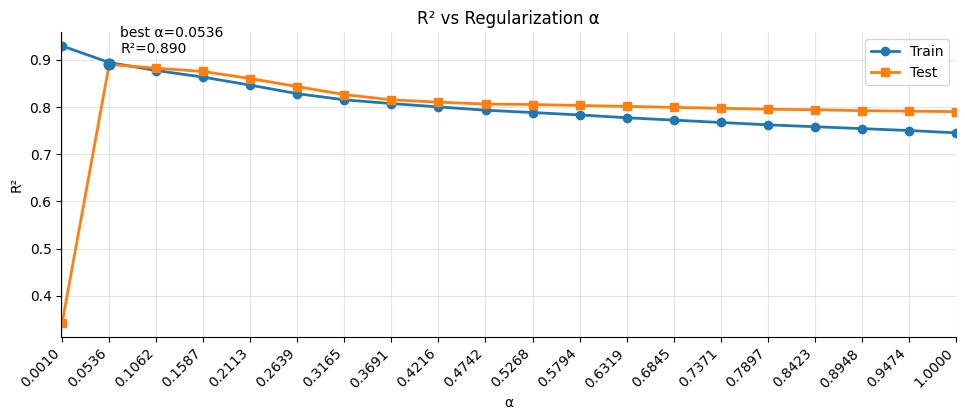

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(alpha_list, train_scores, marker='o', linewidth=2, label='Train')
ax.plot(alpha_list, test_scores,  marker='s', linewidth=2, label='Test')

# Highlight best alpha on Test
i = int(np.nanargmax(test_scores)) # finds the index of the max value in test_scores, ignoring NaNs, and stores it as an int.
ax.scatter(alpha_list[i], test_scores[i], s=60, zorder=3)
ax.annotate(f'best α={alpha_list[i]:.3g}\nR²={test_scores[i]:.3f}',
            xy=(alpha_list[i], test_scores[i]),
            xytext=(8, 8), textcoords='offset points')

ax.set_title('R² vs Regularization α')
ax.set_xlabel('α')
ax.set_ylabel('R²')

# PAY ATTENTION HERE: we use the values for the x-axis from the alpha_list that we generated above. In other words, it contains alphas that we used to generate or maximum values of R^2
ax.set_xticks(alpha_list.round(4))          # 0.00, 0.05, ..., 1.00
ax.set_xlim(0, 1)  

ax.grid(True, alpha=0.3)
ax.legend()
for s in ('top', 'right'):
    ax.spines[s].set_visible(False)

plt.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


Using the graph, we can select the optimal value of the parameter `alpha`.  
We need the point on the x-axis where the test set shows the maximum metric, and at the same time, the difference between the metrics on the training and test sets is minimal.  

It is clear that $R^2$ on the test set reaches its maximum value at the point `0.0536`.  
At this point, the metrics on both datasets are approximately equal. Beyond this, the metric on the test set begins to decrease.  

Note that on the training set, $R^2$ continuously decreases as `alpha` increases.  
This makes sense: the larger the `alpha`, the stronger the regularization, and the less the model adapts to the training set.  

Now let’s substitute the value `alpha = 0.0536` into the Lasso model and get the result:


In [16]:
# Create a linear regression object with L1 regularization
lasso_lr_poly = linear_model.Lasso(alpha=0.0536)
# Train the model
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
# Make predictions for the training set
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
# Make predictions for the test set
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
# Calculate the coefficient of determination for both sets
print(f"Train R^2: {metrics.r2_score(y_train, y_train_predict_poly):.3f}")
print(f"Test R^2: {metrics.r2_score(y_test, y_test_predict_poly):.3f}")

# Train R^2: 0.894
# Test R^2: 0.890

Train R^2: 0.894
Test R^2: 0.890


So, the $R^2$ metric increased because we were able to find the optimal value of the parameter `alpha`.

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Note.</b> In addition to the basic regularization methods <i>L1</i> and <i>L2</i>, there is also a combined method.
</div>

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Elastic Net</b> — a combination of both regularization methods.  
The loss function in this method is expressed as follows:

$$
L_2(w) = MSE + \alpha \cdot \lambda \sum_{i=1}^{m} |w_i| + \alpha \cdot (1 - \lambda) \sum_{i=1}^{m} (w_i)^2 \rightarrow \min_{w}
$$
</div>

In <code>sklearn</code>, the Elastic Net implementation is available in the <code>ElasticNet</code> class.  
The parameters `alpha` and `lambda` allow you to control the contribution of <i>L1</i> and <i>L2</i> regularization.  
In practice, this method is used less frequently since it requires selecting an optimal combination of two parameters.

<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
<b>Note.</b> Regularization is also present in the <code>SGDRegressor</code> model and is used by default.  
In the class initializer, there is a parameter <code>penalty</code>, which determines the type of regularization.  
The parameter can take the values <code>'l1'</code>, <code>'l2'</code>, or <code>'elasticnet'</code>.  
By default, the <i>L2</i>-regularization (<code>penalty='l2'</code>) is used.  
The regularization coefficient (<code>alpha</code>) defaults to <code>0.0001</code> (a relatively weak regularization).  
By adjusting these two parameters, you can control both the type and “strength” of regularization in the <code>SGD</code> method.
</div>
